In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('housing.csv')
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

# Exploratory Data Analysis

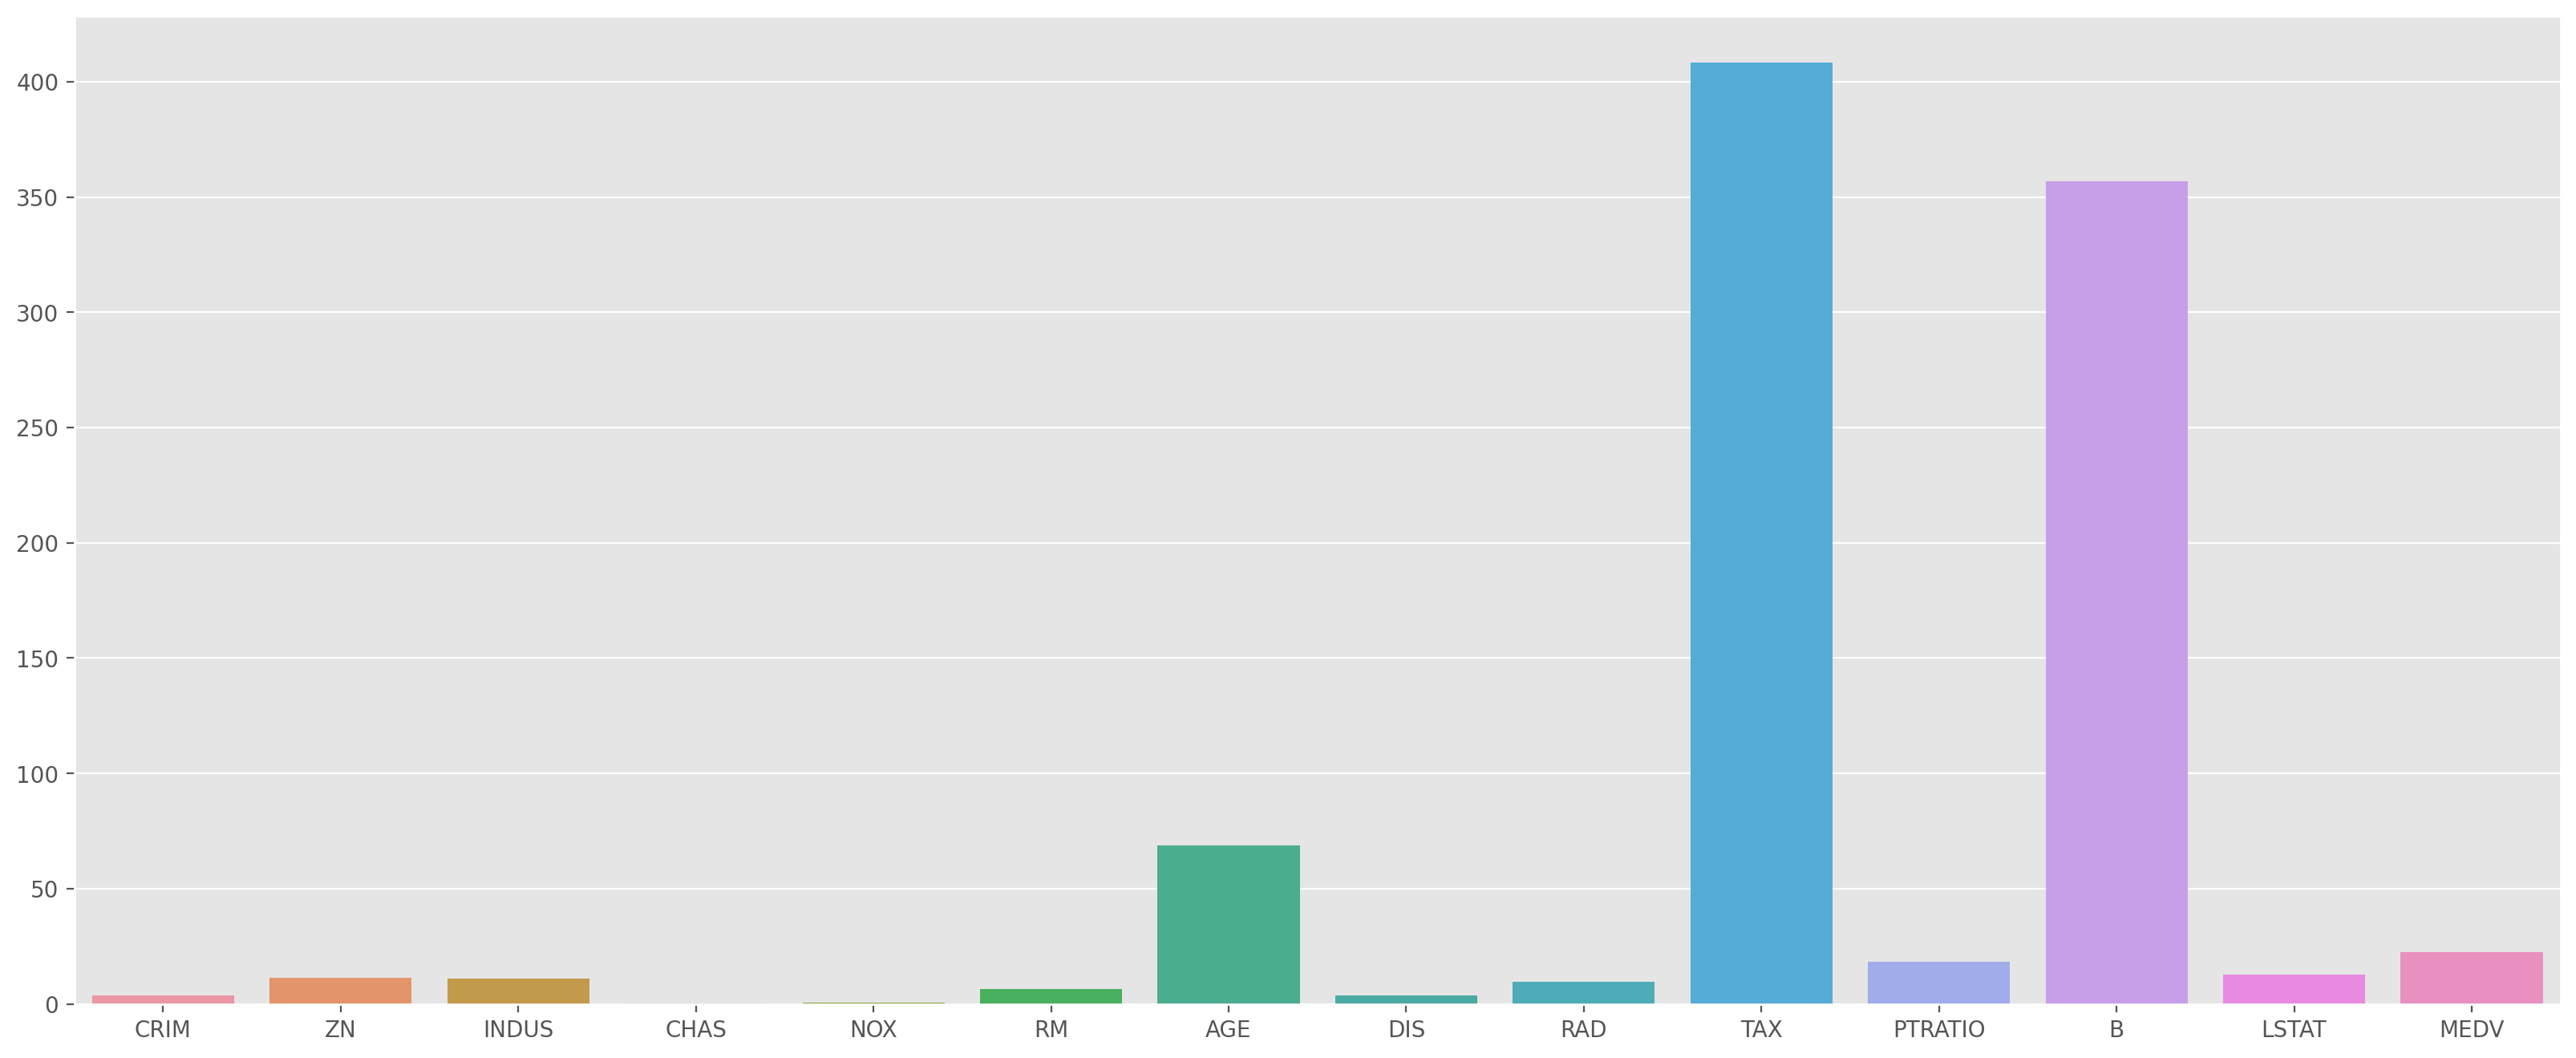

In [3]:
mean = df.describe().loc['mean']

plt.figure(figsize=(20, 8), dpi=200)

sns.barplot(x = mean.index, y = mean.values)

plt.show()

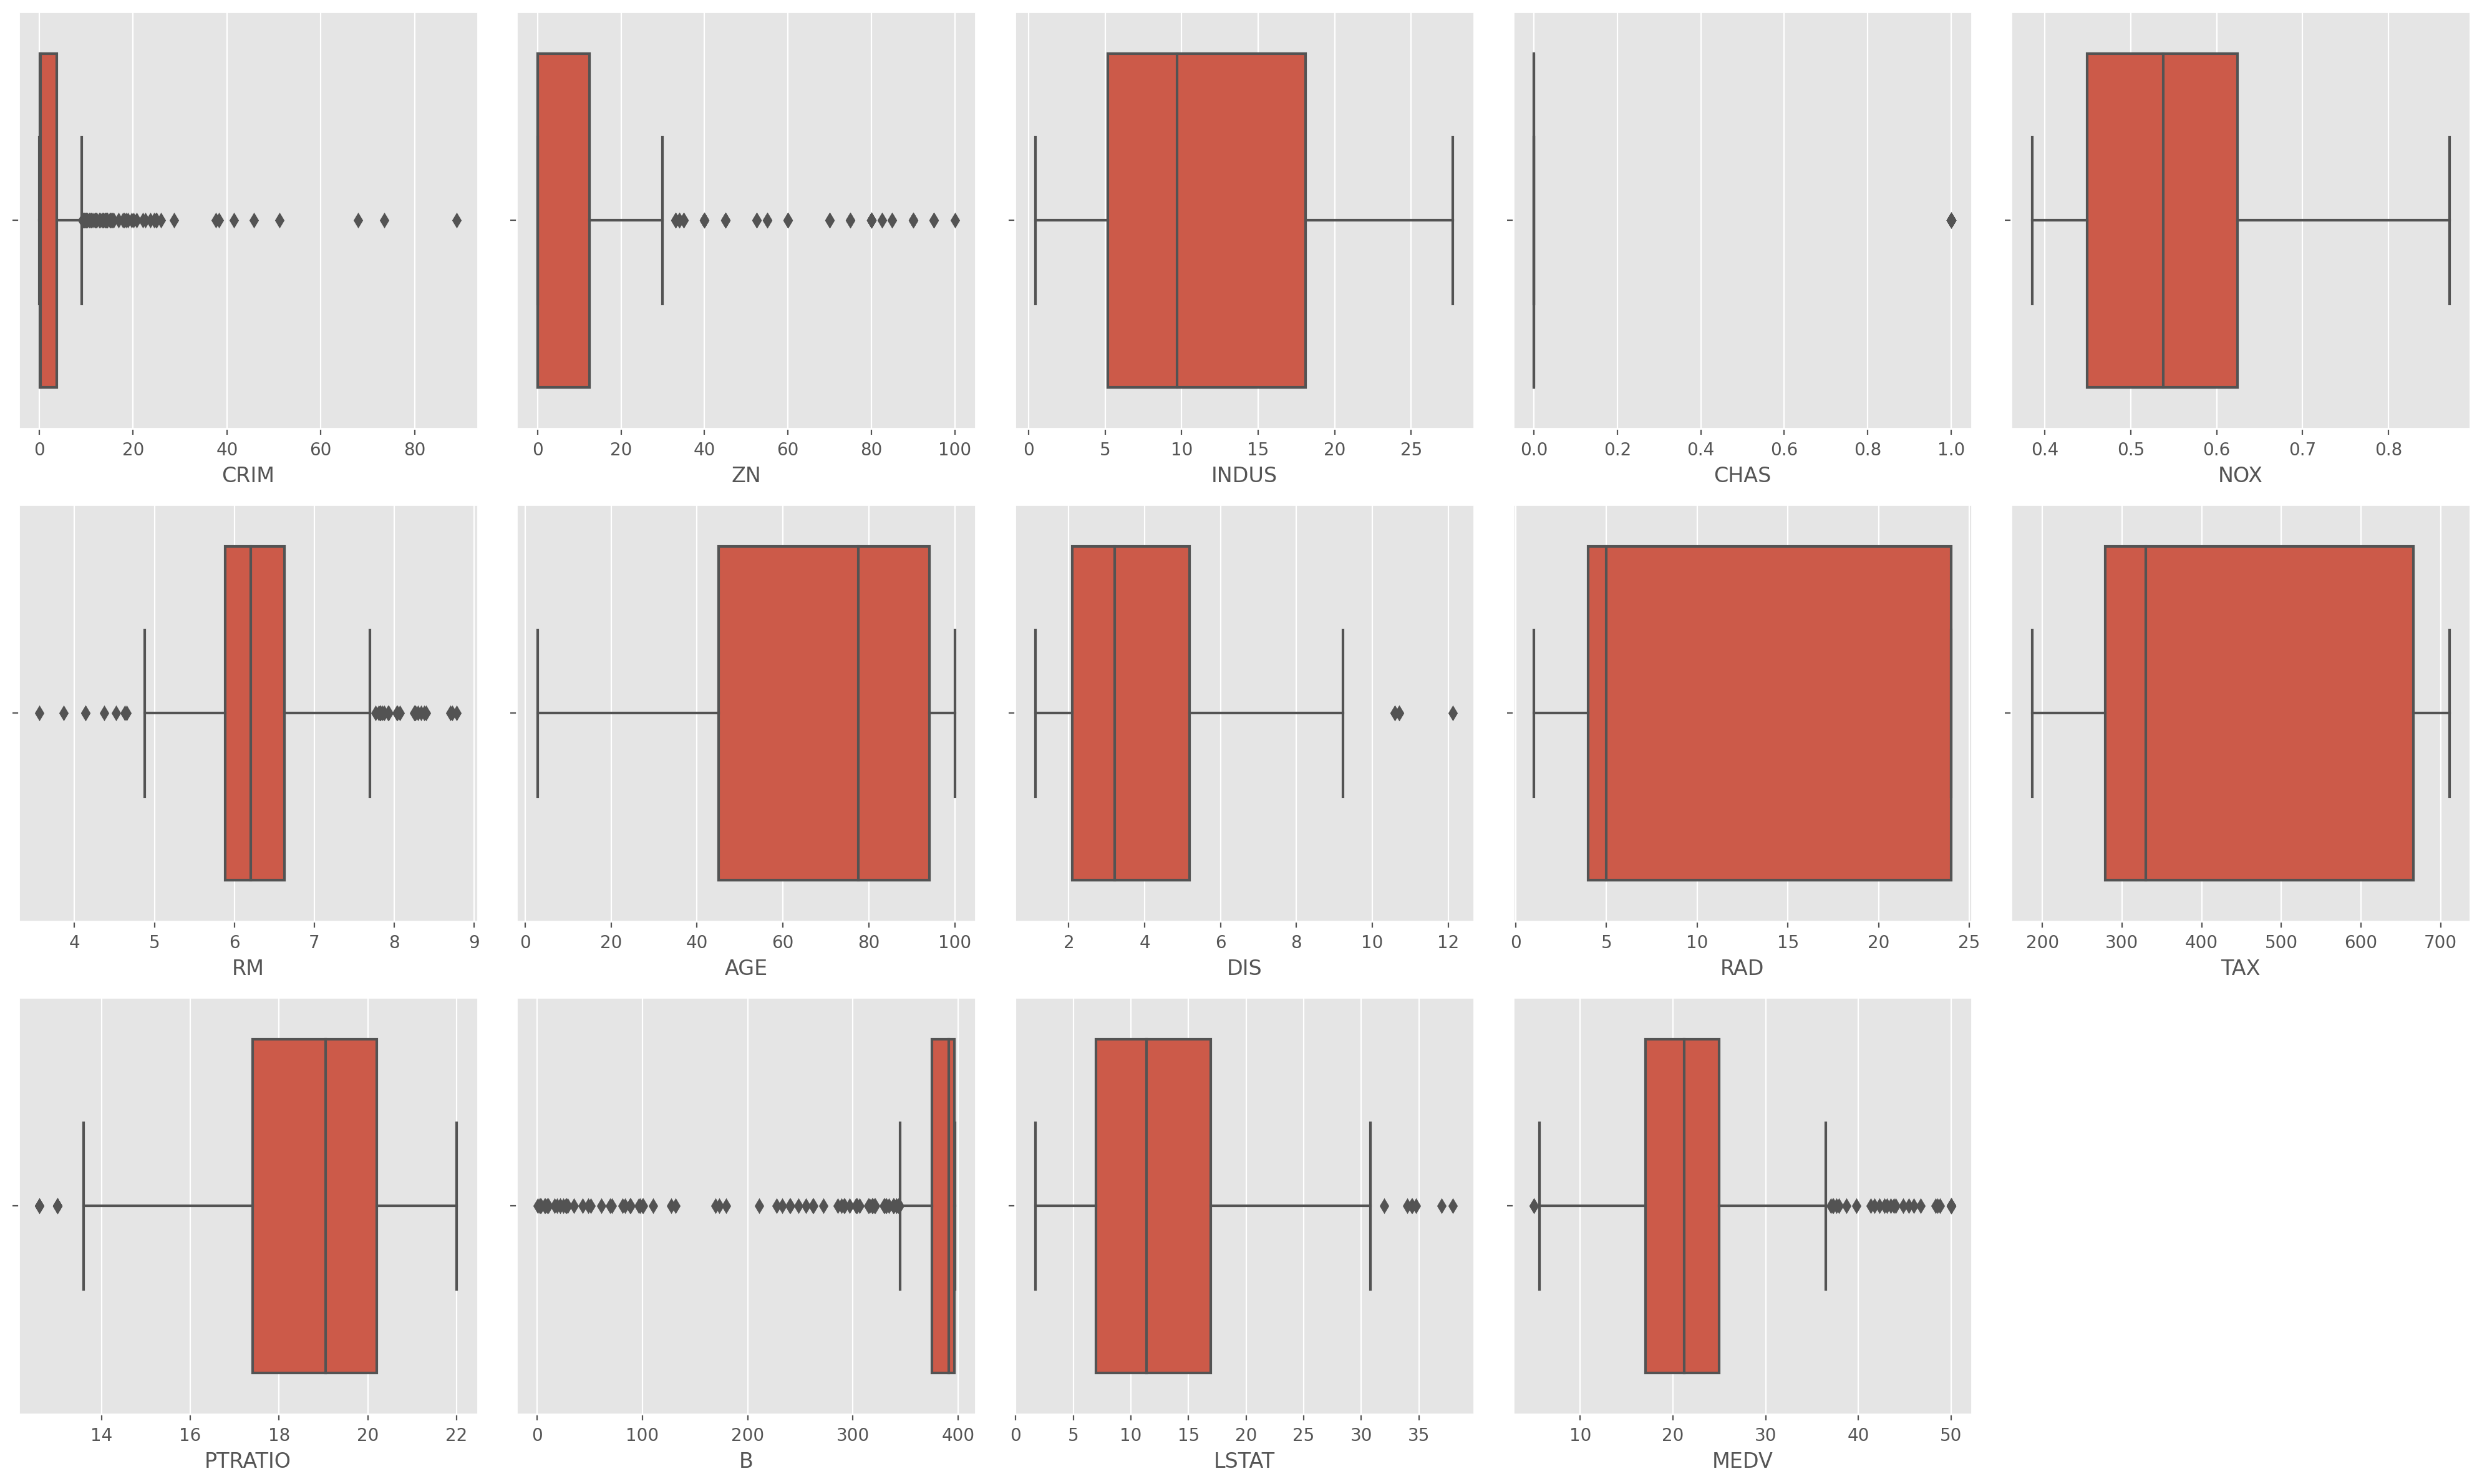

In [4]:
col = df.columns

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20, 12), dpi = 200)
ax = ax.flatten()

for i, var in enumerate(col):
    sns.boxplot(x=var, data = df, ax=ax[i])

fig.delaxes(ax[14])    
plt.tight_layout()

plt.show()

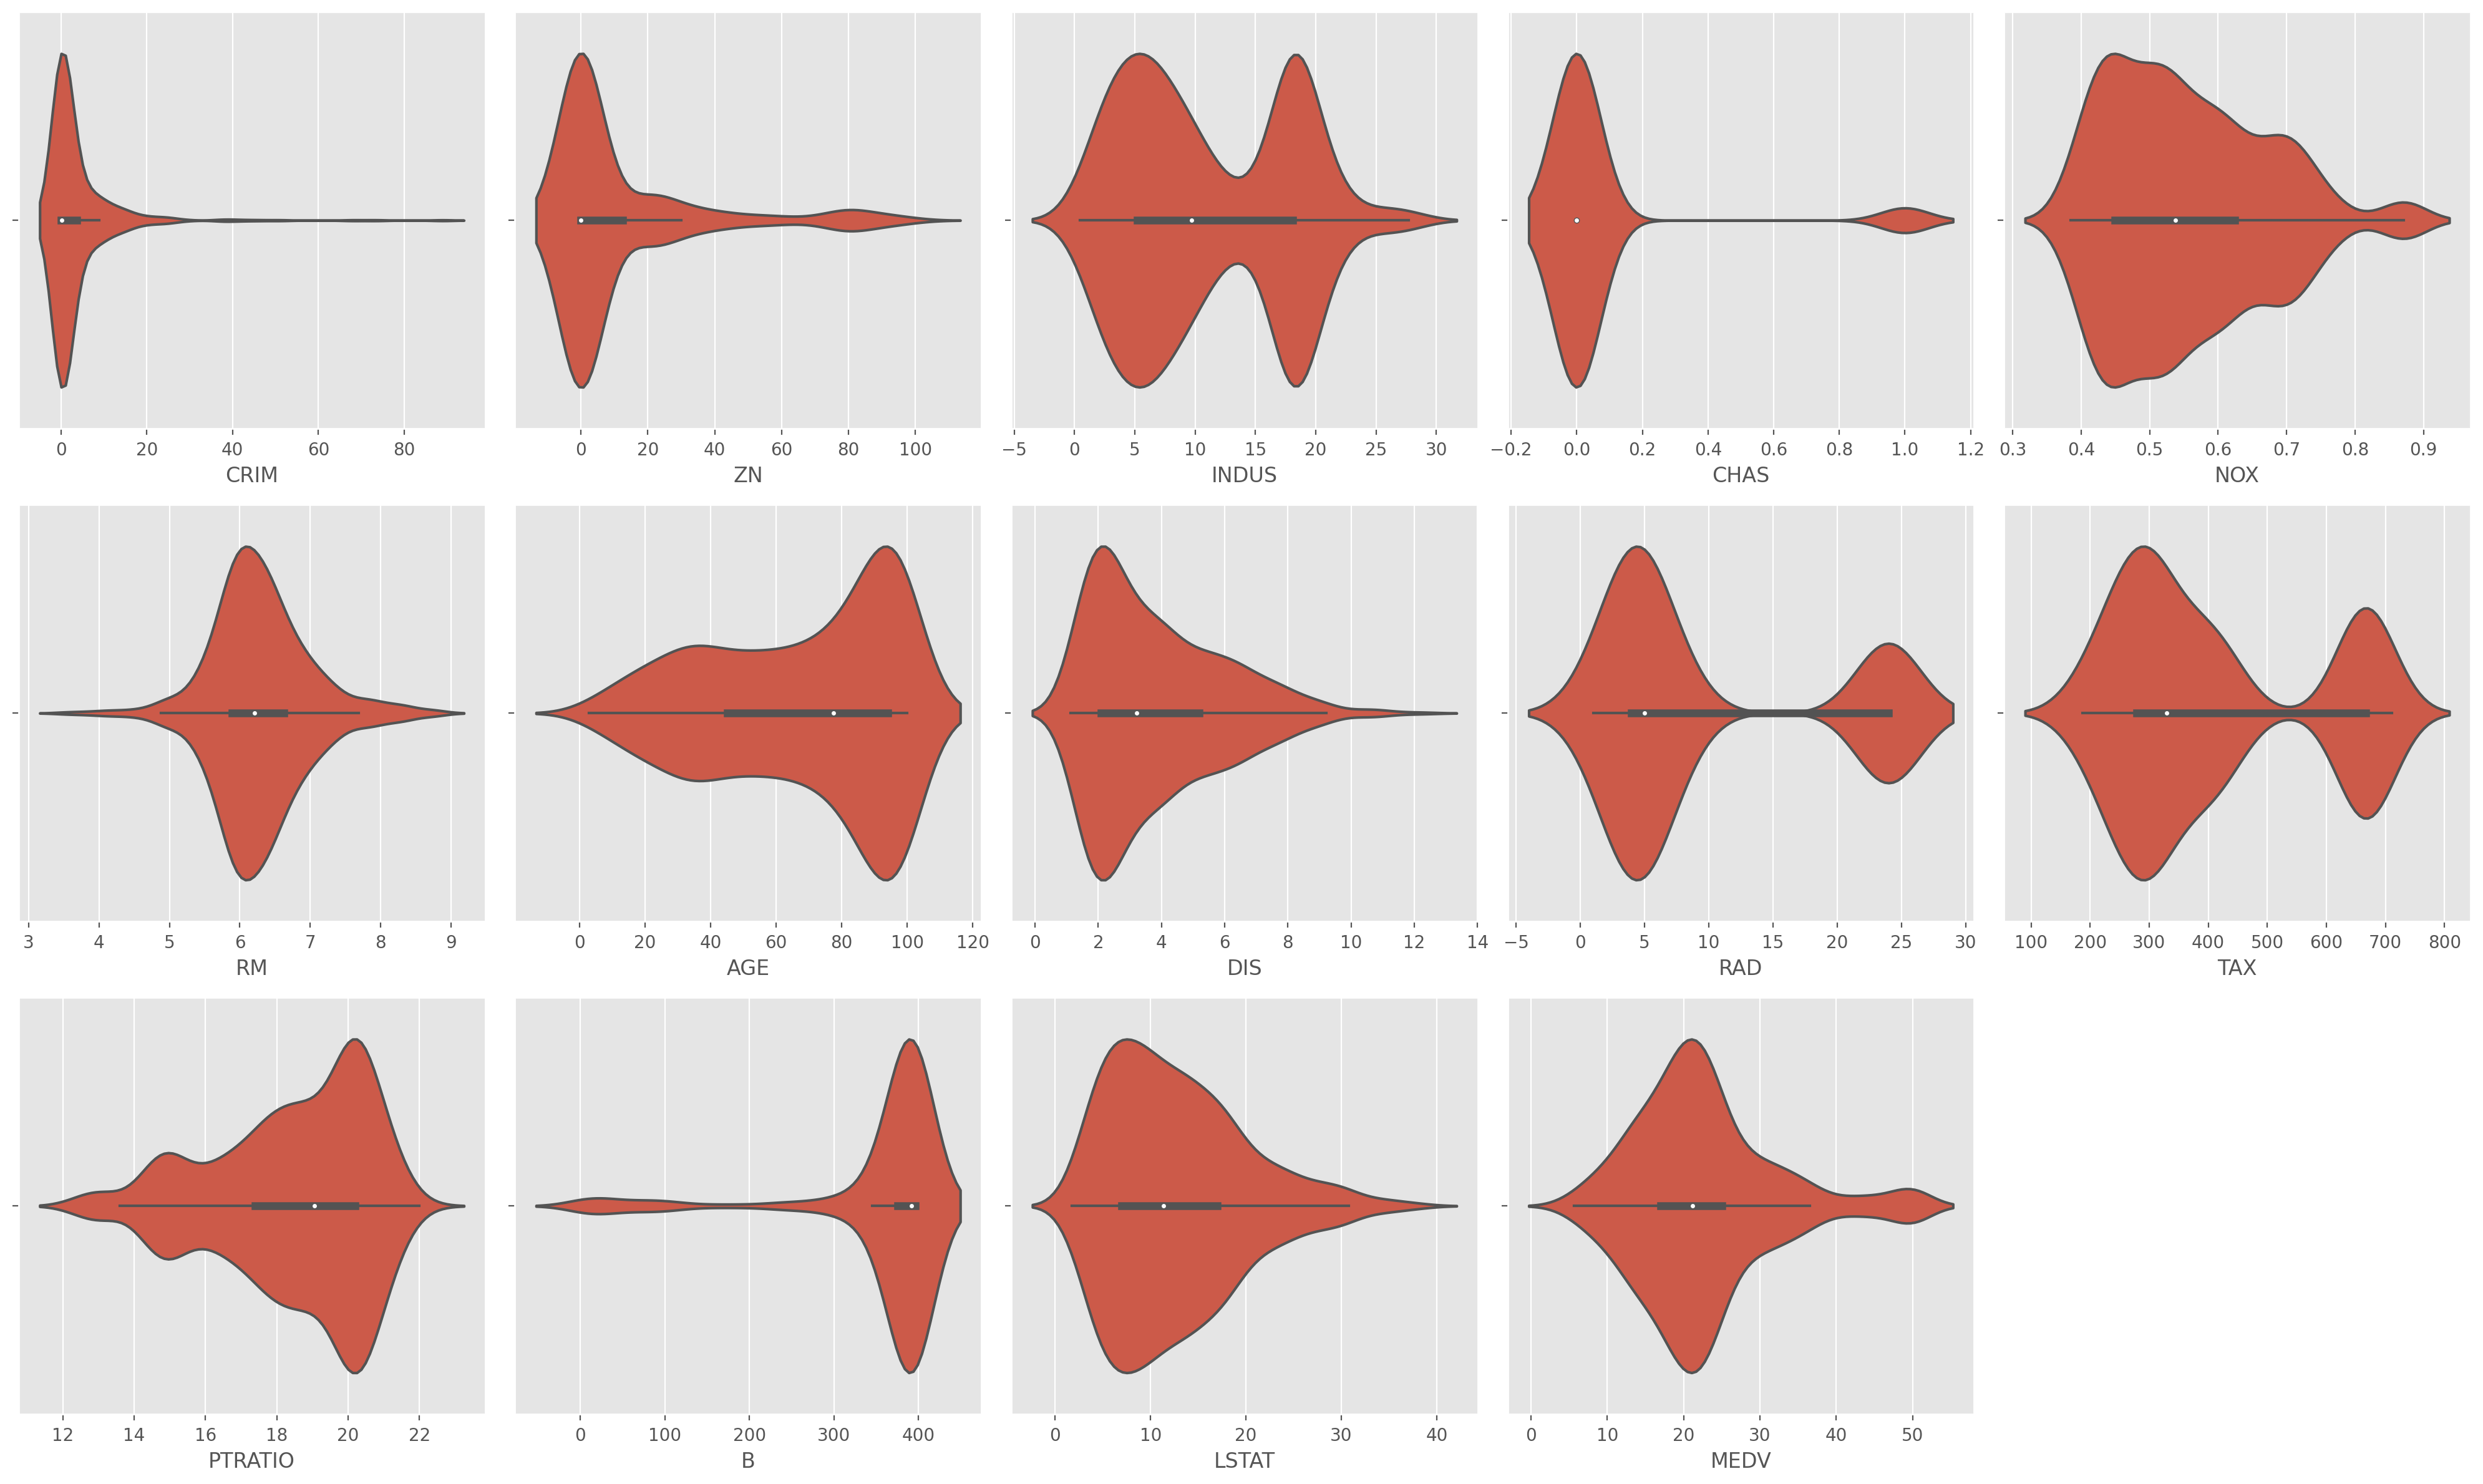

In [5]:
col = df.columns

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20, 12), dpi = 200)
ax = ax.flatten()

for i, var in enumerate(col):
    sns.violinplot(x=var, data = df, ax=ax[i])

fig.delaxes(ax[14])    
plt.tight_layout()

plt.show()

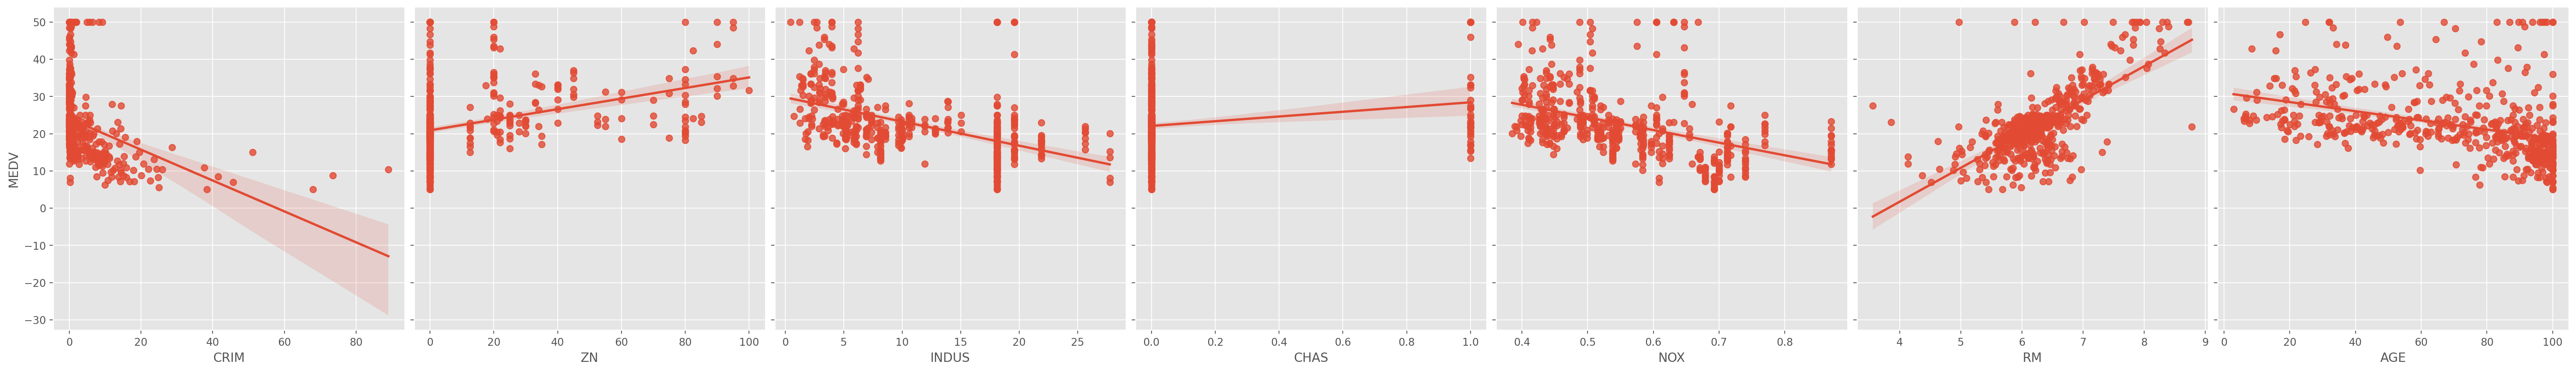

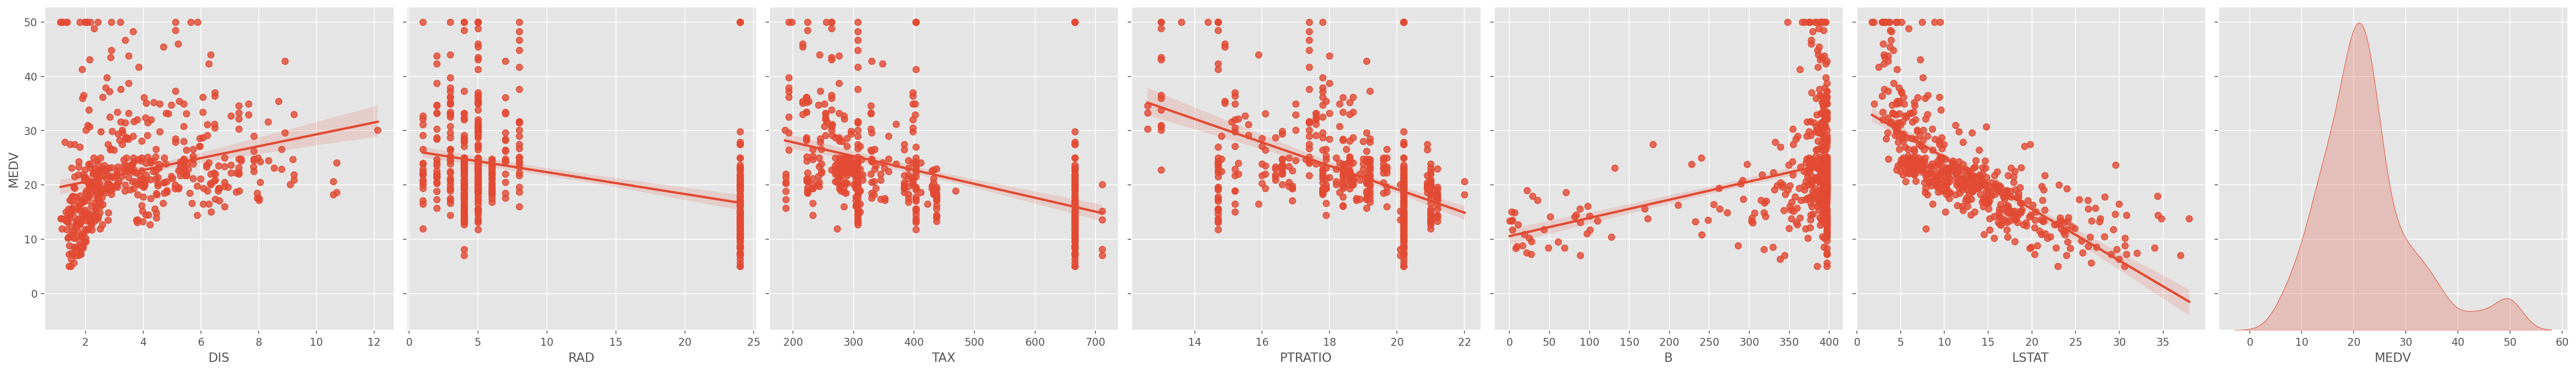

In [6]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.dpi'] = 200

sns.pairplot(data=df, x_vars=col[:7], y_vars='MEDV', kind='reg', height=5)
sns.pairplot(data=df, x_vars=col[7:], y_vars='MEDV', kind='reg', diag_kind='kde', height=5)

plt.show()

# Data Preprocessing

In [7]:
# check missing value

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# check duplicate data

df.duplicated().sum()

0

In [9]:
# Remove Outliers Using Z-Score Method

def remove_outliers(data, columns, threshold):
    cleaned_df = df.copy()
    
    for column in columns:
        z_scores = (cleaned_df[column]-cleaned_df[column].mean())/cleaned_df[column].std()
        
        outliers = np.abs(z_scores) > threshold
        
        cleaned_df.loc[outliers, column] = np.nan
    
    cleaned_df = cleaned_df.dropna()
    
    return cleaned_df

In [10]:
df = remove_outliers(df, ['CRIM', 'ZN','RM','DIS', 'PTRATIO', 'B'], 3)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

# Heatmap

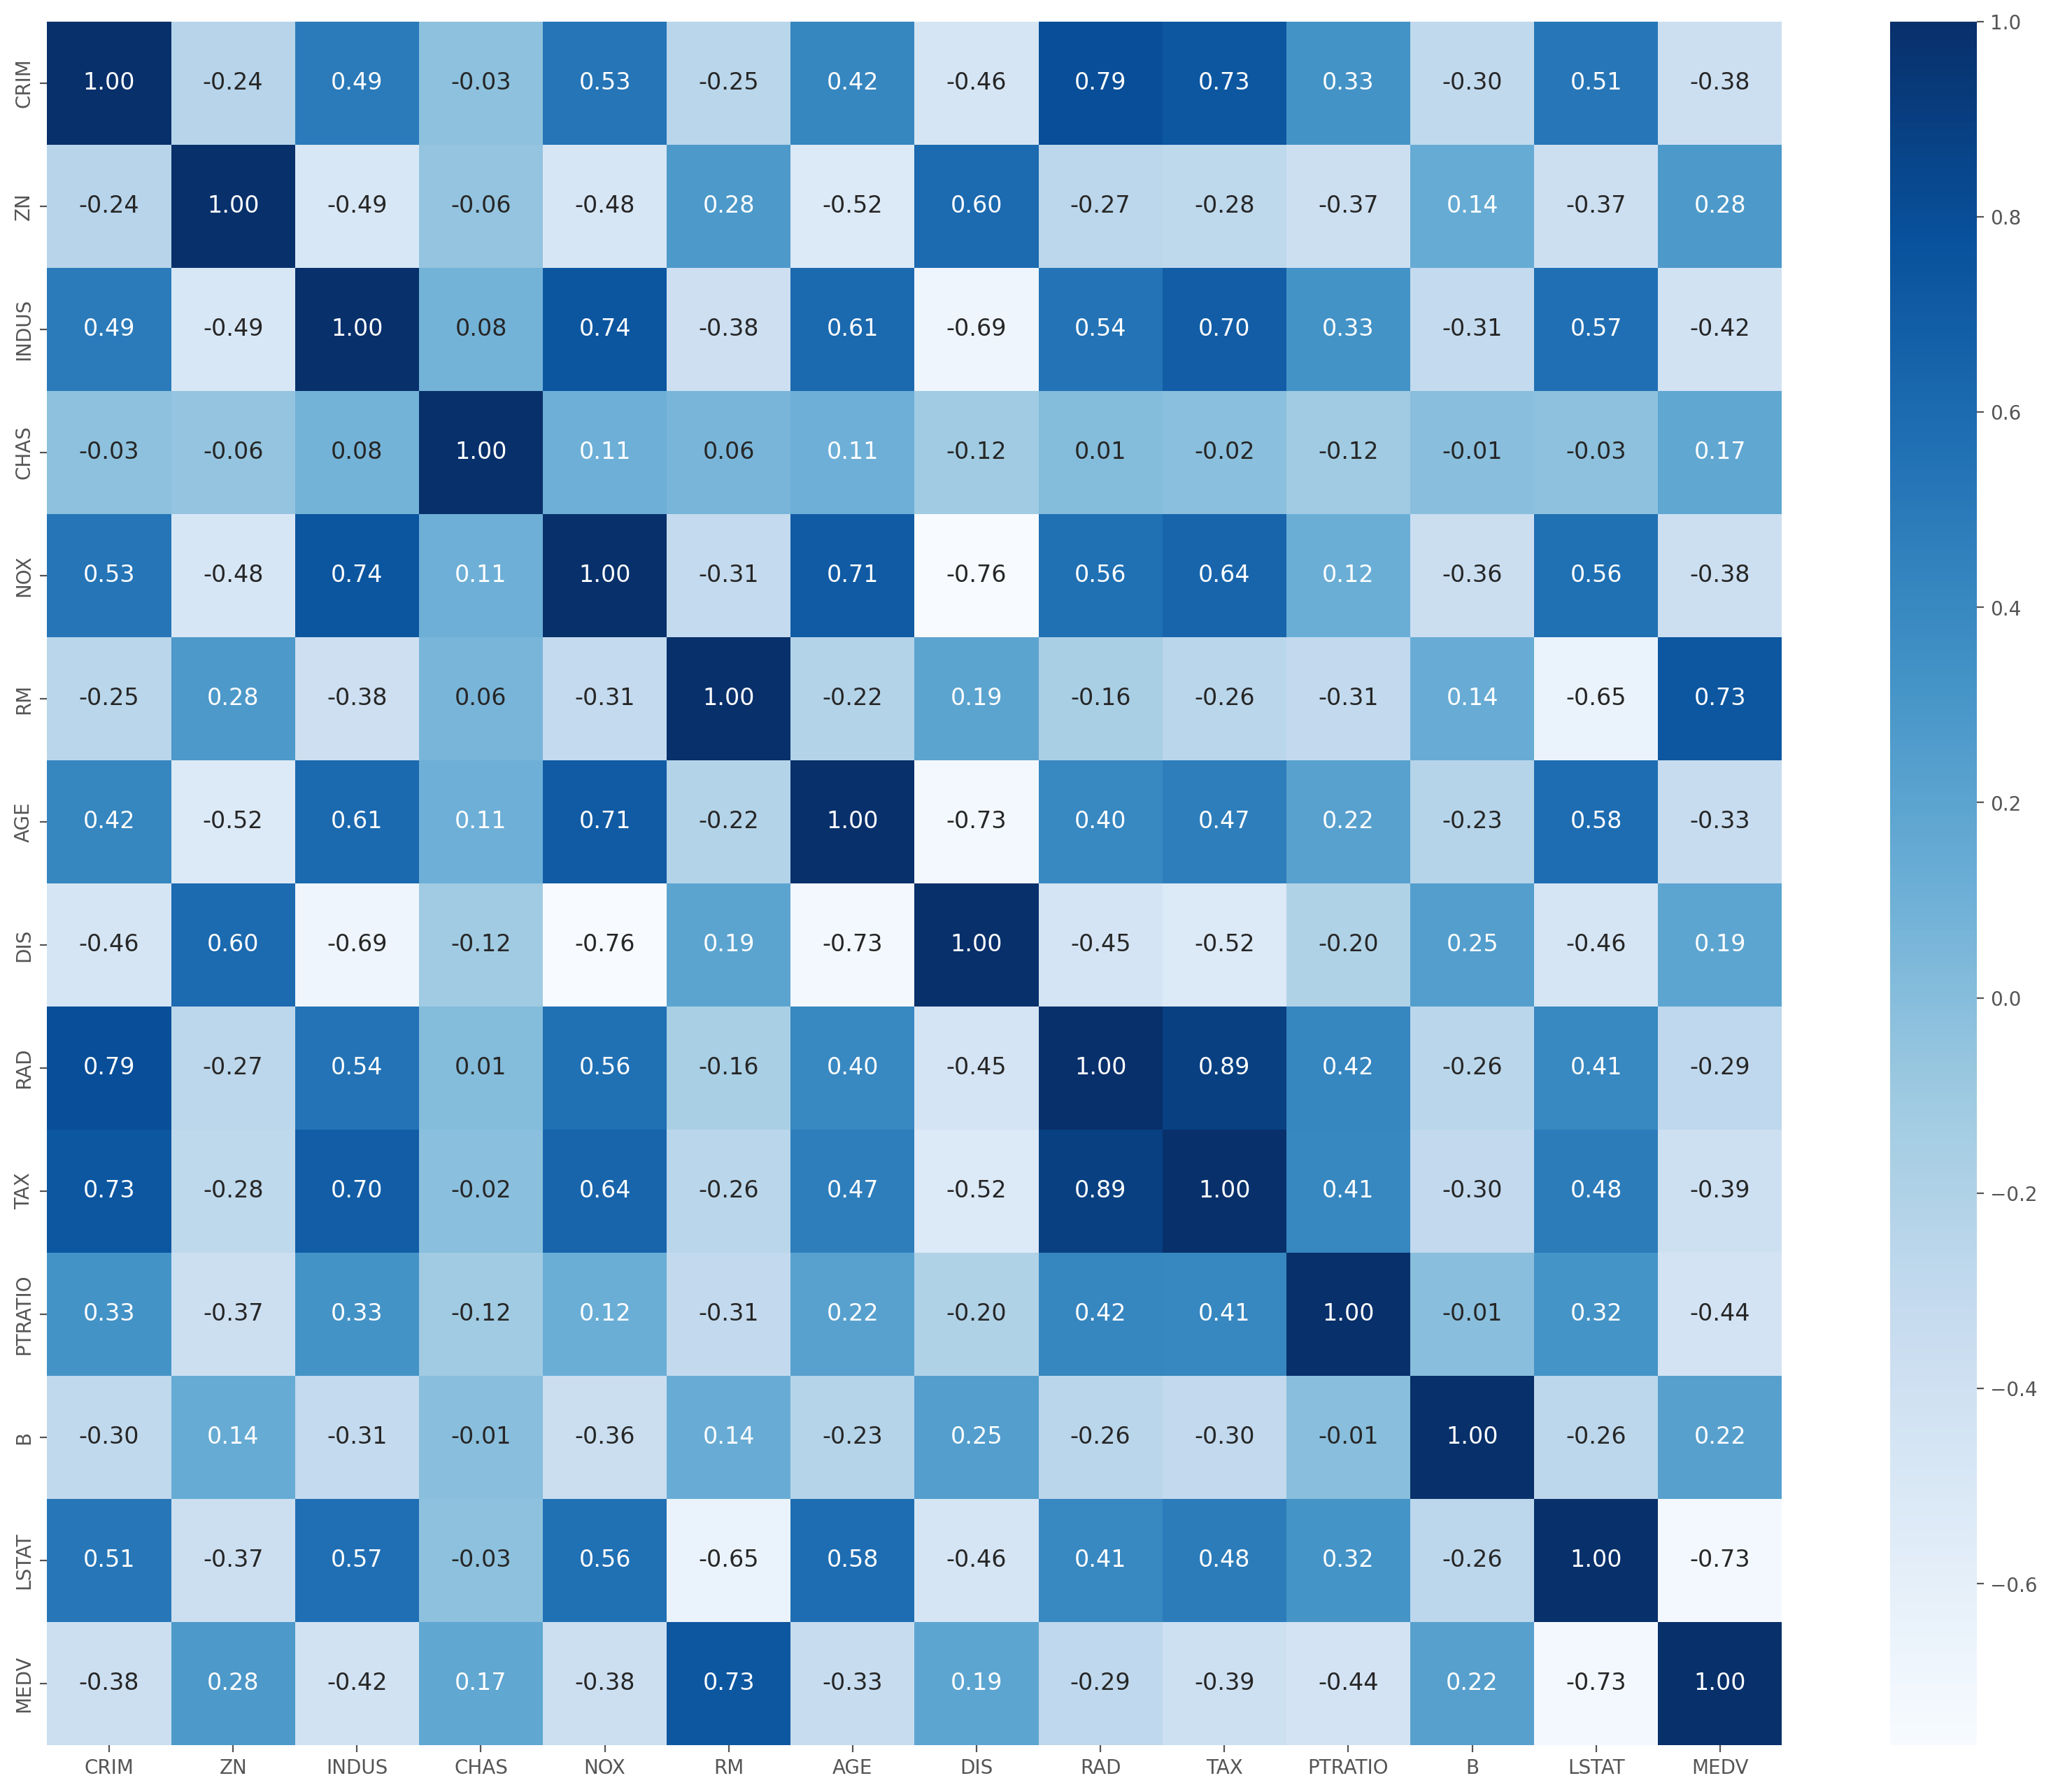

In [11]:
plt.figure(figsize=(20, 16))

sns.heatmap(df.corr(), cmap='Blues', annot=True, annot_kws={'size':12}, fmt='.2f')

plt.show()

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection & Evaluation

# Gradient Boosting Regressor

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

print("R2 Score : ", r2_score(y_test, y_pred))
print("RMSE : ", mean_squared_error(y_test, y_pred))

R2 Score :  0.9293501898090722
RMSE :  4.3894012723542595


In [17]:
import shapash

In [18]:
from shapash.explainer.smart_explainer import SmartExplainer

In [19]:
xpl = SmartExplainer(model=gbr, title_story="Gradient Boosting Regressor")

In [20]:
xpl.compile(
    x=X_test, y_target=y_test)

## Feature Importance

In [21]:
xpl.plot.features_importance(height=400, width=600)

## Scatter Plot Prediction

In [22]:
xpl.plot.scatter_plot_prediction(height=400, width=600)

# Contribution Plot

In [23]:
xpl.plot.contribution_plot(col = 'LSTAT', height=400, width=600)

# XGB Regressor 

In [24]:
import xgboost as xgb

In [25]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

print("R2 Score : ", r2_score(y_test, y_pred))
print("RMSE : ", mean_squared_error(y_test, y_pred))

R2 Score :  0.9151395912023809
RMSE :  5.2722913952938475


In [26]:
import shapash

In [27]:
from shapash.explainer.smart_explainer import SmartExplainer

In [28]:
xpl = SmartExplainer(model=xgbr, title_story="XGB Regressor")

In [29]:
xpl.compile(
    x=X_test, y_target=y_test)

## Feature Importance

In [30]:
xpl.plot.features_importance(height=400, width=600)

## Scatter Plot Prediction

In [31]:
xpl.plot.scatter_plot_prediction(height=400, width=600)

# Contribution Plot

In [32]:
xpl.plot.contribution_plot(col = 'LSTAT', height=400, width=600)

# Extra Trees Regressor

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

In [34]:
etr = GradientBoostingRegressor()
etr.fit(X_train, y_train)

y_pred = etr.predict(X_test)

print("R2 Score : ", r2_score(y_test, y_pred))
print("RMSE : ", mean_squared_error(y_test, y_pred))

R2 Score :  0.925945343867951
RMSE :  4.600940907998553


In [35]:
xpl = SmartExplainer(model=etr, title_story="Extra Trees Regressor")

In [36]:
xpl.compile(
    x=X_test, y_target=y_test)

## Feature Importance

In [37]:
xpl.plot.features_importance(height=400, width=600)

## Scatter Plot Prediction

In [38]:
xpl.plot.scatter_plot_prediction(height=400, width=600)

## Contribution Plot

In [39]:
xpl.plot.contribution_plot(col='LSTAT', height = 400, width = 600)